## Aufgabe 41 
Simulieren Sie einen Datensatz zu folgendem gemischten Modell:
$$y_{ij} = β_0 + β_1 \cdot x^{(1)}_{ij} + β_2 \cdot x^{(2)}_{ij} + β_3 · x^{(3)}_{ij} + b_{0j} + b_{1j} + ϵ_{ij}$$
Mit

• $n = 200$

• $j = 1, 2, 3, 4$

• $β_0 = 2, β_1 = 0.5, β_2 = 1.5, β_3 = 0.8$

• $x^{(1)} ∼ N (10, 3), x^{(2)} ∼ \text{Unif} (10, 50), x^{(3)} ∼ \text{Exp}(2)$

• $b_{0j} ∼ N (0, 100) \text{ und } b_{1j} ∼ N (0, 5) \text{ mit Cov}(b_{0j} , b_{1j} ) = 0$

• $ϵ_{ij} ∼ N (0, 20)$

Berechnen Sie das dazugehörige gemischte Modell mittels `lme(.)`.

In [52]:
library(nlme)
set.seed(NULL)

create_data_and_fit <- function(seed) {
    n <- 200
    j <- c(1,2,3,4)
    J <- length(j)
    b0 <- 2
    b1 <- 0.5
    b2 <- 1.5
    b3 <- 0.8
    sd_e <- sqrt(20)
    
    set.seed(seed)
    
    # Normalverteilte Datensätze
    x1 <- rnorm(J * n, 10, 3)
    x2 <- runif(J * n, 10, 50)
    x3 <- rexp(J * n, rate=2)
    
    sd_b0j <- sqrt(100)
    sd_b1j <- sqrt(5)
    
    b_0j <- rnorm(J, 0, sd_b0j)
    b_1j <- rnorm(J, 0, sd_b1j)
    
    # Epsilon
    e <- rnorm(J * n, 0, sd_e)
    
    group <- rep(1:J, each = n)
    
    data <- data.frame(group, x1, x2, x3)
    
    data$y <- b0 + b1 * data$x1 + b2 * data$x2 + b3 * data$x3 + b_0j[data$group] + b_1j[data$group] + e

    model <- lme(
        fixed = y ~ x1 + x2 + x3,
        random = ~ 1 | group,
        data = data
    )

    return(list(model = model, fix = fixef(model)))
}


model <- create_data_and_fit(591)
summary(model$model)

Linear mixed-effects model fit by REML
  Data: data 
       AIC      BIC    logLik
  4673.725 4701.803 -2330.862

Random effects:
 Formula: ~1 | group
        (Intercept) Residual
StdDev:    5.142305 4.385696

Fixed effects:  y ~ x1 + x2 + x3 
                Value Std.Error  DF   t-value p-value
(Intercept) 0.0980847 2.6647970 793   0.03681  0.9706
x1          0.5019451 0.0519357 793   9.66473  0.0000
x2          1.5035754 0.0136234 793 110.36740  0.0000
x3          0.8984654 0.3139029 793   2.86224  0.0043
 Correlation: 
   (Intr) x1     x2    
x1 -0.198              
x2 -0.152  0.003       
x3 -0.054  0.029 -0.058

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-3.000810377 -0.641183703  0.001536662  0.642817134  3.532694923 

Number of Observations: 800
Number of Groups: 4 

## Aufgabe 42
Wiederholen Sie die Simulation aus Aufgabe 40, 1000 mal, d.h.,
simulieren Sie 1000 Datensätze mit den Parameterangaben von zuvor und berechnen auf jedem das gemischte Modell. Stimmt der Mittelwert der geschätzten Parameter über die Simulationen mit den Ausgangsparametern überein?

In [56]:
# Werte der ersten Simulation
print(coef(model$model))
co <- coef(model$model)
mean(co[,1])

  (Intercept)        x1       x2        x3
1   18.515507 0.5498992 1.508715 0.8791769
2    7.683764 0.5498992 1.508715 0.8791769
3   14.224398 0.5498992 1.508715 0.8791769
4    2.614257 0.5498992 1.508715 0.8791769


[1] 10.75948

In [76]:
results <- data.frame(Intercept = numeric(),
                      x1 = numeric(),
                      x2 = numeric(),
                      x3 = numeric())
for (i in 1:1000) {
    # Setze auf NULL, um unterschiedliche Werte zu bekommen
    model <- create_data_and_fit(NULL)
    co <- coef(model$model)
    mean_intercept <- mean(co[,1])
    
    all_coefs <- data.frame(Intercept = mean_intercept, x1 = co[,2][1], x2 = co[,3][1], x3 = co[,4][1])
    results <- rbind(results, all_coefs)
}

In [77]:
data.frame("Durchschnittswert Intercept" = mean(results$Intercept), "Durchschnittswert x1" = mean(results$x1), "Durchschnittswert x2" = mean(results$x2), "Durchschnittswert x3" = mean(results$x3))

Durchschnittswert.Intercept,Durchschnittswert.x1,Durchschnittswert.x2,Durchschnittswert.x3
<dbl>,<dbl>,<dbl>,<dbl>
1.956966,0.5001181,1.499442,0.7903657


## Aufgabe 43
Betrachten Sie den Datensatz amlodipine aus dem R-Paket
`meta`. Dieser enthält Ergebnisse von acht randomisierten klinischen Studien.
In diesen wurde die Wirksamkeit des Medikaments Amlopidine untersucht im
Vergleich zu einem Placebo. Die response Variable war dabei die Veränderung in der Arbeitsleistung von jedem Patient. Fassen Sie die Studien mittles
einer random effects Meta-Analyse zusammen. Stellen Sie die Ergebnisse als
Forestplot dar.

In [2]:
library(meta)

ERROR: Error in library(meta): there is no package called ‘meta’


Error beim Installieren von meta! Alles ausprobiert...

## Aufgabe 44
Worin sehen Sie Gemeinsamkeiten und worin Unterschiede hinsichtlich klassischer Statistik und Maschinellem Lernen?

#### Gemeinsamkeiten
- Beide können eingesetzt werden, um Beziehungen in Datensätzen zu erkennen und zu quantifizieren
- Es wird eine gewisse Menge an Eingangsdaten gebraucht, um sinnvolle Ergebnisse zu erzielen
- 

#### Unterschiede
- ML kann allgemeinere und komplexere Muster erkennen
- ML kann ohne Vorwissen einen Datensatz analysieren
- Kl. Statistik ist zur Bestätigung von Hypothesen sinnvoll, während ML gute Vorhersagen produzieren kann
- Kl. Statistik braucht allgemein weniger Daten



## Aufgabe 45
Die Grafik beschreibt zwei Laborwerte $x_1$ und $x_2$ von fünfzehn
Patient:innen (schwarz = Krebs, weiß = Kontrollen). Für den neuen Patienten
(dargestellt als Stern) soll der Krebsstatus vorhergesagt werden. Verwenden Sie
den k-NN Algorihmus, um den neuen Patienten zu klassifizieren. Nutzen Sie
dafür die k = 1 und k = 3 nächsten Nachbarn. Treffen Sie Annahmen, wie Sie
die Wahrscheinlichkeit, dass der neue Patient ein Krebspatient ist, bestimmen
können.

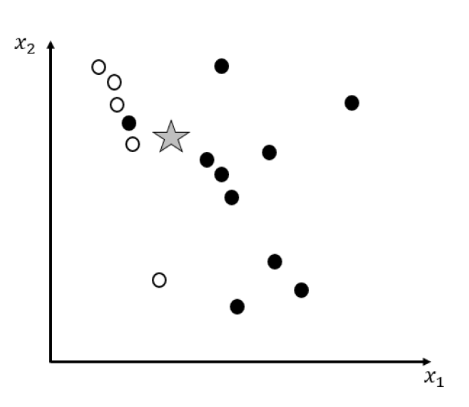
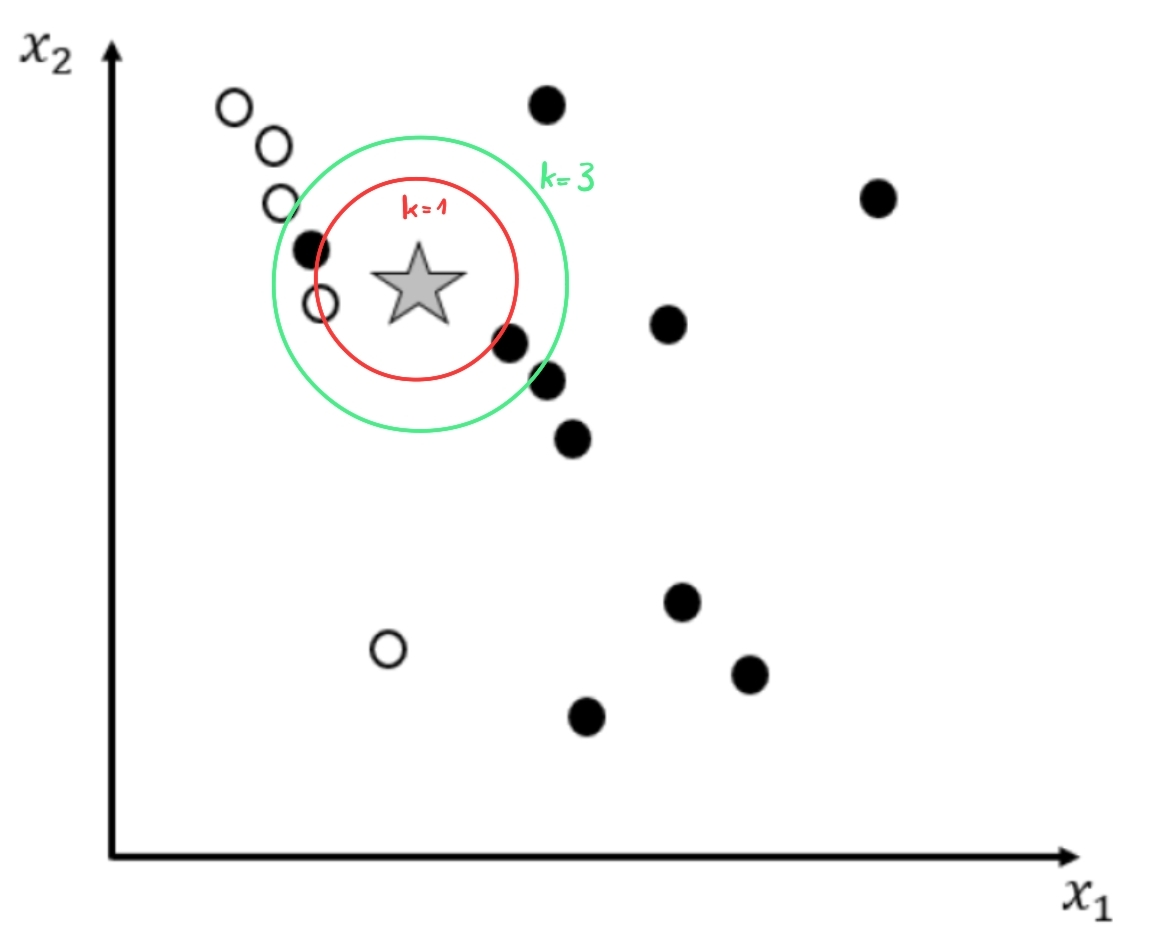

Um die Wahrscheinlichkeit zu bestimmen, dass der nächste Patient Krebs hat, kann mann berechnen
$$
\frac{\text{Nachbarn mit Krebs}}{\text{Alle Nachbarn}}
$$

#### Falls $k=1$
Der einzige Nachbar ist negativ, also folgt
$$
\frac{0}{1} = 0\%
$$
#### Falls $k=3$
Zwei Nachbarn sind nun positiv
$$
\frac{2}{3} \approx 66\%
$$